# Wine Quality
The focus of this project is on predicting the quality of wine based on its chemical characteristics in the context of viticulture. The dataset encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.

###### Importing all the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

###### Loading the dataset(CSV file)

In [5]:
data = pd.read_csv(r"C:\Users\swarn\OneDrive\Desktop\DA\DA internships\AICTE Oasis Infobytes\Wine Quality\WineQT.csv", encoding = 'latin-1')
#r is used to remove the unicode error due to '\'
wine = pd.DataFrame(data)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


###### Display dataset overview

In [7]:
print(wine.shape)

(1143, 13)


In [8]:
print(wine.describe(include='all'))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [9]:
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


###### Correlation matrix

In [10]:
print(wine.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

###### Group by quality

In [11]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


###### Plotting insights 

<AxesSubplot:xlabel='citric acid', ylabel='count'>

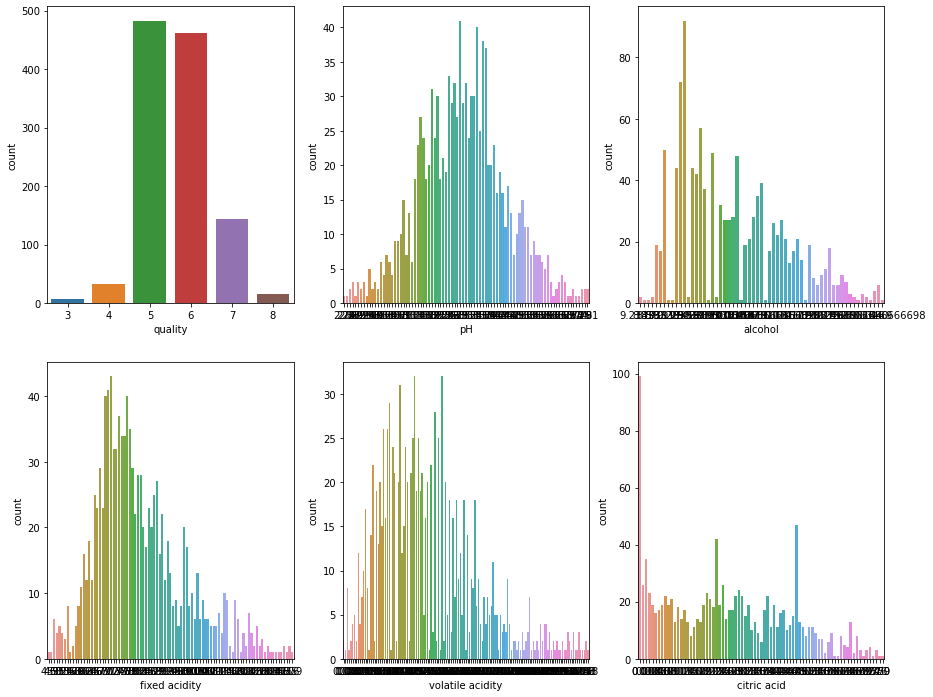

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
sns.countplot(x='quality', data=wine, ax=axes[0, 0])
sns.countplot(x='pH', data=wine, ax=axes[0, 1])
sns.countplot(x='alcohol', data=wine, ax=axes[0, 2])
sns.countplot(x='fixed acidity', data=wine, ax=axes[1, 0])
sns.countplot(x='volatile acidity', data=wine, ax=axes[1, 1])
sns.countplot(x='citric acid', data=wine, ax=axes[1, 2])

<AxesSubplot:xlabel='density', ylabel='count'>

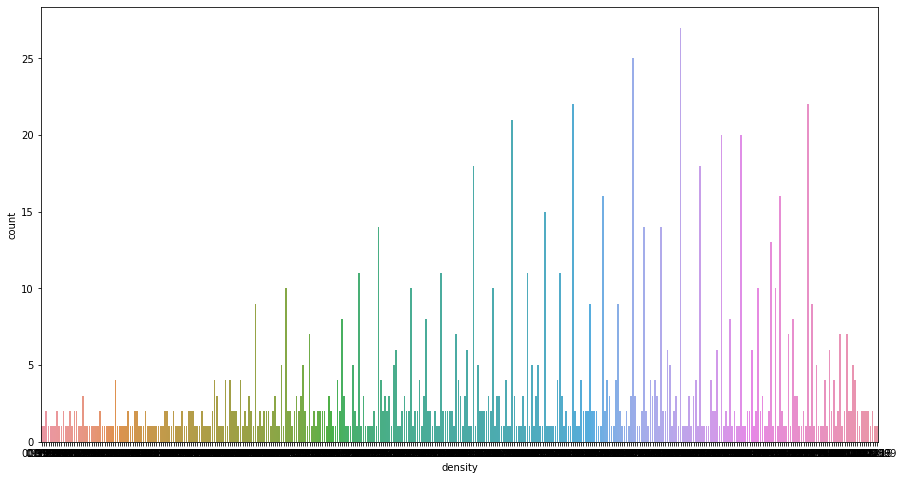

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
sns.countplot(x='density', data=wine)

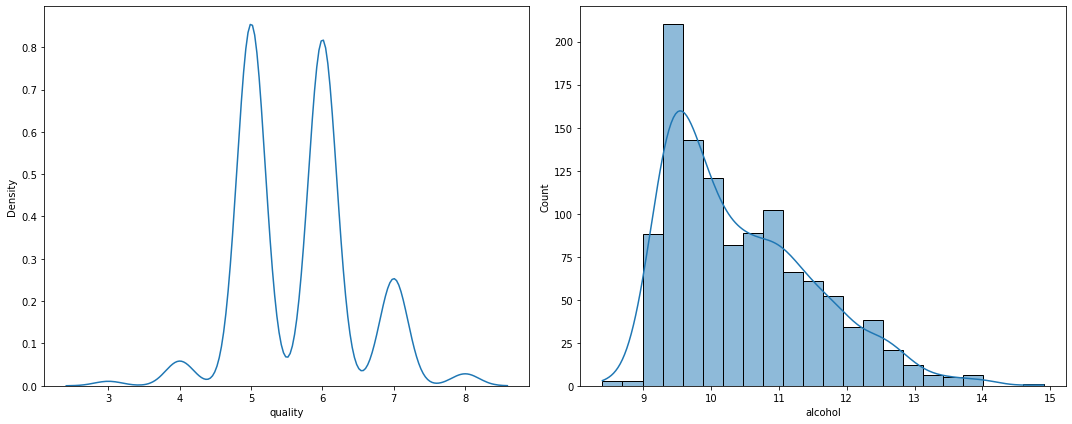

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.kdeplot(wine.query('quality > 2').quality, ax=axes[0])
sns.histplot(wine['alcohol'], kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

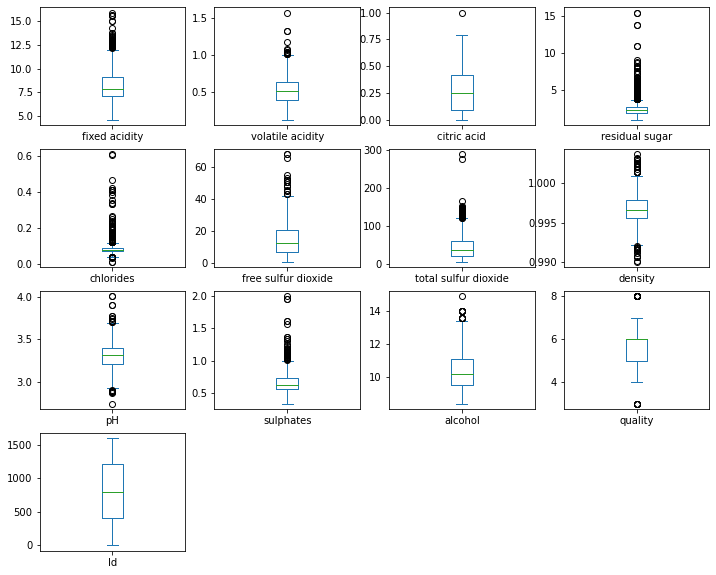

In [33]:
wine.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.show()

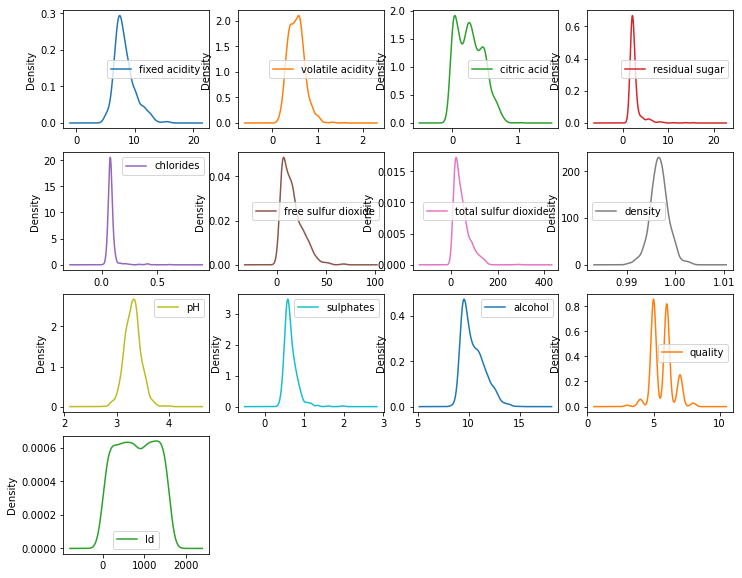

In [34]:
wine.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.show()

In [35]:
# Create classification version of target variable
wine['goodquality'] = wine['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [36]:
# Separate feature variables and target variable
X = wine.drop(['quality', 'goodquality'], axis=1)
Y = wine['goodquality']

In [37]:
# Feature Importance using ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X, Y)
print("Feature Importances:", classifiern.feature_importances_)

Feature Importances: [0.07014604 0.10264268 0.10448021 0.06469624 0.0647791  0.05757892
 0.07337254 0.07918021 0.05949469 0.09923496 0.15673193 0.06766249]


In [40]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [44]:
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs')  # Increased max_iter to 1000
logreg_model.fit(X_train, Y_train)
Y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Accuracy Score:", accuracy_score(Y_test, Y_pred_logreg))

Logistic Regression Accuracy Score: 0.8833819241982507


In [45]:
# GaussianNB Model
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
Y_pred_gnb = gnb_model.predict(X_test)
print("GaussianNB Accuracy Score:", accuracy_score(Y_test, Y_pred_gnb))

GaussianNB Accuracy Score: 0.8483965014577259


In [46]:
# Support Vector Classifier (SVC) Model
svc_model = SVC()
svc_model.fit(X_train, Y_train)
Y_pred_svc = svc_model.predict(X_test)
print("SVC Accuracy Score:", accuracy_score(Y_test, Y_pred_svc))

SVC Accuracy Score: 0.8688046647230321


In [47]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy Score:", accuracy_score(Y_test, Y_pred_rf))

Random Forest Accuracy Score: 0.8950437317784257
